# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle

# Importing a few others I want
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [26]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

## Visualize

In the below cells I will add some visualizations.

First up, as is often important in machine learning tasks, we need to check the distribution of the data; in this case, how many of each sign we have in our dataset. If it is too skewed, the model might appear to get a high training accuracy while deciding just to constantly misclassify some of the small classes.

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

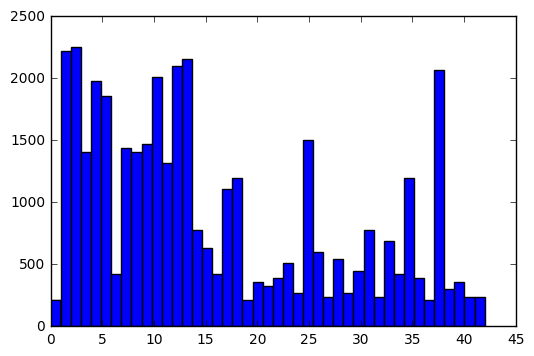

In [27]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Making a histogram for the distribution
plt.hist(y_train, bins = n_classes)

Ok, so this looks a little bit skewed. This might create an issue. I'll come back to this later.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [28]:
import cv2

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [29]:
from numpy import newaxis

print('Preprocessing training data...')

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize(X_train) 

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')

Preprocessing training data...
Finished preprocessing training data.
Processed training data shape = (39209, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

Answer: My first thought was that grayscaling the data would help. It looked like TensorFlow's tf.image.rgb_to_grayscale() function was an option, but I found that to be a little slow. OpenCV's grayscaling was also an option, although it gives back only height and depth, and would therefore require some additional work on the model to get it to feed in correctly. Numpy's "newaxis" feature allowed me to add back the additional 'depth' of 1 so that I did not need to redo my neural network further.

My assumption was that for the signs I looked at in the provided .csv file, there wasn't going to be a whole lot of additional information gained from rgb versus grayscale, so grayscaling could make the neural network faster and potentially help it focus more on what was important.

Also, I normalized the data between .1 and .9, similar to what was discussed in one of the TensorFlow lectures, so that I could keep numerical stability for any of the larger mathematical sequences occurring. This helps scale down some of the disparity within the data. Also, using .1 to .9 avoids any potential problems incurred by allowing the data down to zero (which could potentially break some equations down the road).

In [30]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# I will generate some additional data, then split the data in a later cell.
# This is to help with the issue identified in the original histogram
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to make the code below easier to distinguish
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)

print('Generating new data.')

# Angles to be used to rotate images in additional data made
angles = [-10, 10, -15, 15, -20, 20]

# Iterate through each class
for i in range(len(pics_in_class)):
    
    # Check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class back to the original data
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated. Any classes lacking data now have', min_desired, 'pictures.')

Generating new data.
Additional data generated. Any classes lacking data now have 911 pictures.


Let's check how the new distribution of data looks.

The updated number of training examples = 52396


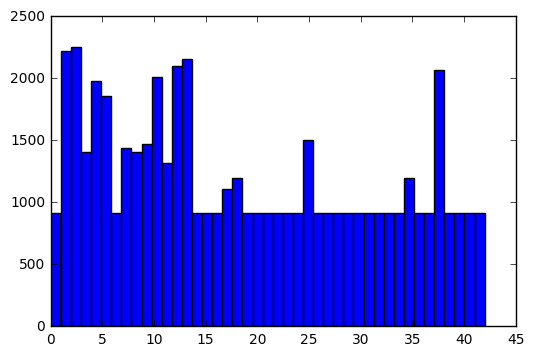

In [31]:
plt.hist(y_train, bins = n_classes)

updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

Now the classes that I lacked data in have been brought up to the mean. It looks a little funky, but the neural network now has a lot more examples to go off of for the classes that did not have sufficient data in the original dataset; this should help avoid it overfitting to only the largest classes.

In [32]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

Dataset successfully split for training and validation.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer: To add the additional data, I iterated through each class, and for each class than was below the mean number of pictures for all classes, I went further to add pictures. The actual additional data was generated from the already existing pictures in each class, by having the loop pick a random angle to rotate using scipy's 'ndimage.rotate' function. I had it go through the loop until enough of these additional pictures were generated to rise to the mean. This is why the histogram ends up having a ton of classes at the same spot, as that was the mean of the original data.

For the training and validation data, I split up the training dataset using sklearn's 'train_test_split'. I also shuffled the data just before the split so that I wouldn't end up putting all of a few signs into the validation set, with none in the training set (which would get the model really good at the training set but unable to do anything on the test set). 

I will just be using the original test data as the test set.

In [34]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

EPOCHS = 10
BATCH_SIZE = 150

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, with layer 1 as input instead of x
    # And then of course changing the numbers to fit the desired ouput of 10x10x16
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    
    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [35]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [36]:
# Setting learning rate, loss functions, and optimizer
rate = 0.005

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [37]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


Answer: My network is a convolutional neural network, as these tend to do very well with images. I mostly used the same architecture as the LeNet neural network did, with 2 convolutional layers and 3 fully connected layers. I also did a few attempts with one less convolutional layer (which sped it up by a decent amount but dropped the accuracy) as well as one less fully connected layer (which only marginally dropped the accuracy).

One item I did change from the basic LeNet structure was adding dropout to the fully connected layers. Although this makes initial epochs in validation a little worse, I gained an additional 3% on test accuracy. Since I was getting to validation accuracy of around 97%, with test accuracy down by 88-89%, there was clearly a little bit of overfitting being done. Dropout helped get my test accuracy into the 90's by preventing some of that overfitting. I put dropout at 0.7 probability as that tended to still validate at a decent rate within an acceptable number of epochs over a lower number such as 0.5. Also, I switched max pool to average pool as that seemed to slightly increase accuracy.

Note also that due to grayscaling, and adding back a dimension (see above) for depth, the inputs for my network need to be at 32x32x1, instead of the original 32x32x3 that the data had at first.

In [38]:
### Train your model here.
### Feel free to use as many code cells as needed.
save_file = 'train_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

Training...

EPOCH 1 ...
Validation Accuracy = 0.833

EPOCH 2 ...
Validation Accuracy = 0.934

EPOCH 3 ...
Validation Accuracy = 0.954

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.970

EPOCH 6 ...
Validation Accuracy = 0.967

EPOCH 7 ...
Validation Accuracy = 0.973

EPOCH 8 ...
Validation Accuracy = 0.981

EPOCH 9 ...
Validation Accuracy = 0.980

EPOCH 10 ...
Validation Accuracy = 0.981

Trained Model Saved.


In [39]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9277117848396301


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Answer: I utilized the AdamOptimizer from within TensorFLow to optimize, which seemed to do better than a regular Gradient Descent Optimizer. Also, I tried a few different batch sizes (see below), but settled at 150 as that seemed to perform better than batch sizes larger or smaller than that. I ran only 10 epochs, primarily as a result of time and further performance gains, as it was already arriving at nearly 97-98% validation accuracy, and further epochs resulted in only marginal gains while continuing to increase time incurred in training. Additionally, there is no guarantee that further improvement in validation accuracy does anything other than just overfit the data (although adding dropout to the model does help in that regard).

For the model hyperparameters, I stuck with a mean of 0 and standard deviation/sigma of 0.1. An important aspect of the model is trying to keep a mean of 0 and equal variance, so these hyperparameters attempt to follow this philosophy. I tried a few other standard deviations but found a smaller one did not really help, while a larger one vastly increased the training time necessary.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Answer: I ran through a few items for each paramater in order to tune my model further. The results of this are shown below; not that this is not a true grid search as I was only tuning one parameter at a time as opposed to checking every combination of the below items. For speed's sake, I stuck to 10 epochs, although there is definitely a potential had I ran through something like 100 epochs to improve the validation accuracy while at the same time arriving at a better final test score. The default otherwise used was a learning rate of .01, 150 batch size, 2 convolutional layers and 3 fully connected layers (which is after a little bit of guess and check already).

Learning rate after 10 epochs:  
.1 = .040  
.01 = .976
.005 = .983
.001 = .973 

Batch size after 10 epochs:  
250 = .967  
150 = .976  
50 = .043  

Less layers after 10 epochs:  
2 convolutional, 3 fully connected = .976  
1 convolutional, 3 fully connected = .944  
2 convolutional, 2 fully connected = .979 (this came out slightly better than the 2 conv and 3 fully connected above, but given the similarity I preferred the slightly deeper model as there was almost no difference in speed. The slightly more complex model did end up performing on the true test data as well).

As the CNN with 2 convolutional layers, 3 fully connected, a learning rate of .005 and a batch size 150 appears to result in the optimal CNN, I utilized this for the final model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

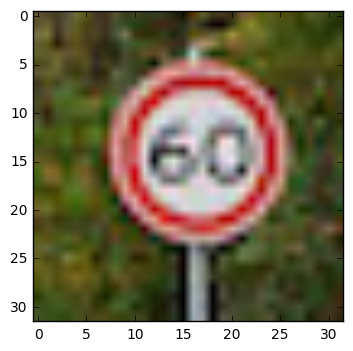

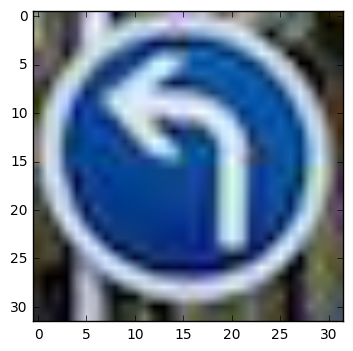

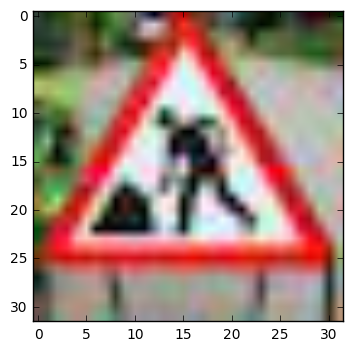

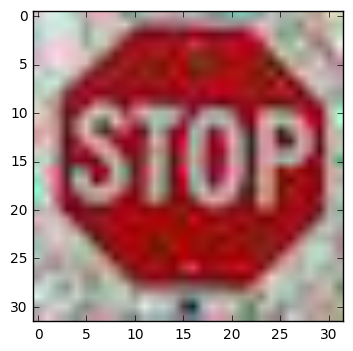

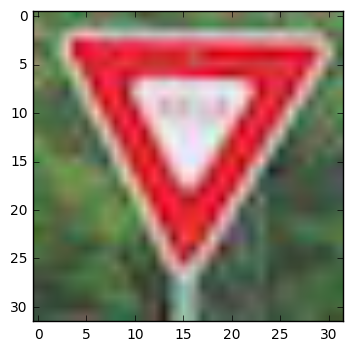

In [69]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!
import os
import matplotlib.image as mpimg
add_pics = os.listdir("add_pics/")
# Drop the mac's created '.DS_Store' file
add_pics = add_pics[1:6]

# Show the images, add to a list to process for classifying
add_pics_data = []
for i in add_pics:
    i = 'add_pics/' + i
    image = mpimg.imread(i)
    add_pics_data.append(image)
    plt.imshow(image)
    plt.show()

In [70]:
# Make into numpy array for processing
add_pics_data = np.array(add_pics_data)

# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(add_pics_data.shape)

(5, 32, 32, 3)


In [71]:
print('Preprocessing additional pictures...')

# Iterate through grayscale
add_pics_data = preprocess(add_pics_data)
add_pics_data = add_pics_data[..., newaxis]

# Normalize
add_pics_data = normalize(add_pics_data) 

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
new_image_shape = add_pics_data.shape
print("Processed additional pictures shape =", new_image_shape)

Preprocessing additional pictures...
Finished preprocessing additional pictures.
Processed additional pictures shape = (5, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



Answer: The five images I have added are: 1) a 60 km/h sign, 2) a left turn ahead sign, 3) a road work sign, 4) a stop sign and 5) a yield sign. 

One difficulty may be due to the low resolution of the images.

I think it will definitely be able to tell the 60 km/h sign is a speed sign (which are all circles), but it may struggle to figure out the exact speed.

The left turn ahead sign should not be too difficult for it to do.

The road work sign could potentially be a struggle, due to a few signs using the same overall triangular shape. If the classifier pays attention to the shapes in the center it should still do fine.

I am hoping the stop sign and yield sign should do well - those are more unique than a lot of the signs.

In [72]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Launch the model on the new pictures
with tf.Session() as sess:
    saver.restore(sess, save_file)

    new_pics_classes = sess.run(logits, feed_dict={x: add_pics_data, keep_prob : 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Answer: My model ends up only getting the stop sign and yield sign correct in these new images, so 40% (see predicted classes below). However, as I discuss more in depth in Question 8, this is a bit misleading - it gets fairly close on an additional two images when looking at the softmax probabilities.

This is of course quite a bit lower than compared to the test set. This is likely caused by the highly curated nature of the original dataset, as my own images were only quickly cropped and downsized from those I obtained from the internet. 

In [73]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 3.03309155  2.41271877  1.75632858  1.72345114  0.60690355] 
 and predicted classes: [ 5  8  2  7 15]
Image 1 probabilities: [ 8.0857048   6.42439413  6.23442554  5.48292875  0.67928708] 
 and predicted classes: [15 34 14 38 13]
Image 2 probabilities: [ 10.5228138    0.83246541  -0.41929895  -1.15431499  -2.12207341] 
 and predicted classes: [12  1 26 18 15]
Image 3 probabilities: [ 12.84325218   4.51827669   4.01993608   2.46773171   0.54282039] 
 and predicted classes: [14 38 13 34 15]
Image 4 probabilities: [ 32.57807159  16.27171135  12.46237373   7.02534246   6.84057856] 
 and predicted classes: [13 35 34  9 38]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Answer: See the softmax outputs above. 

For the first image, the 60 km/h sign, as I expected, it got the fact that it was a speed sign correct, but unfortunately thought it was the 80 km/h sign. Given the highest probability was only around 3%, the model definitely struggles distinguishing between speed signs (the top four probabilities are all speed signs).

For the second (left turn), it unfortunately guessed it as a "No Vehicles" sign first; however, the second highest probability is the correct answer of the Left Turn Ahead. I'm fairly intrigued by the model putting the No Vehicles sign here, as it actually lands in the top five for four of the five signs I looked at. It must mainly be focused on the sign being round for that one.

For the third, it incorrectly guesses priority road. I believe this is due to the sign shape. Somewhat oddly, it never guesses the road work sign at all. This may be due to the limited number of epochs (10) I ran on the model - the complexity of the inner shape may be difficult for the model to learn in such a short time (if at all).

It correctly guesses both the fourth and fifth images! It is much more confident on the yield sign than anything it thought on the others.

So, my model only worked exactly on 40% of the additional pictures. However, it also correctly identified the 60 km/h sign as a speed sign, and was fairly close on the Left Turn Ahead sign, so with some tweaking of either the model or further preprocessing of the images, I bet I could get to at least 80% on these. This is of course still lower than the nearly 93% achieved on the test data, but still would be fairly good for not having curated the images exactly like whomever did so on the original dataset.